In [1]:
import numpy as np
import matplotlib.pyplot as plt
from acf import acf
from scipy.optimize import curve_fit
from ising import *

In [2]:
size = 1_000
n_sweeps = 1_000_000
beta = 1
J = 1.0
h = 0.0
configuration = init_configuration(size)
energies, magnetizations = monte_carlo_noconfig(n_sweeps, beta, J, h, configuration)

In [3]:
corr = acf(magnetizations)

In [4]:
corr.shape

(1001,)

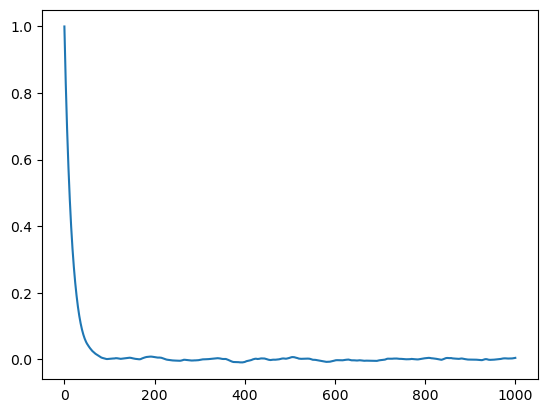

In [5]:
plt.plot(corr)

In [6]:
def exponential_decay(x, tau, a=1):
    return a * np.exp(-x/tau)

In [7]:
x = np.arange(corr.shape[0])

In [8]:
params, _ = curve_fit(exponential_decay, x, corr)

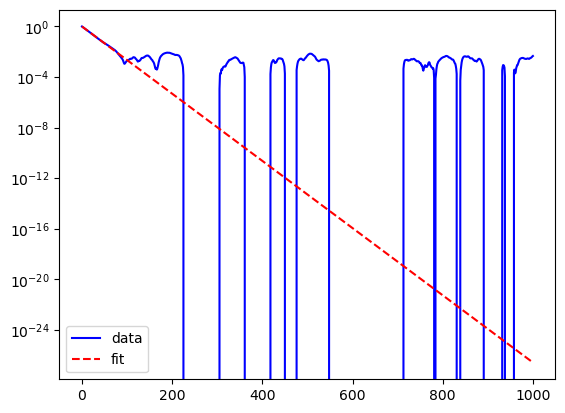

In [9]:
plt.plot(x, corr, 'b-', label='data')
plt.plot(x, exponential_decay(x, *params), 'r--', label='fit')
plt.yscale('log')
plt.legend();

In [10]:
params

array([16.34936094,  0.99861119])

In [11]:
tau = 1/2
for i in x:
    tau += corr[i]
    if i >= 6 * tau:
        break
    else:
        continue

In [12]:
tau

17.314497655522082